In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')

/tmp/ipykernel_37560/1685328232.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
with open('/home/ruixing/workspace/bcinterface/2DMotorData.pkl','rb') as file:
    data = pickle.load(file)
label = pd.read_csv('/home/ruixing/workspace/bcinterface/BehaviorMeta.csv')

In [18]:
data.keys()

dict_keys(['Cursor', 'Joystick', 'NeuralTimestamp'])

In [3]:
label_list = list(label.iloc[:,1])

In [11]:
# colors (deep to shallow)
colors = cm.viridis(np.linspace(0,1,120))

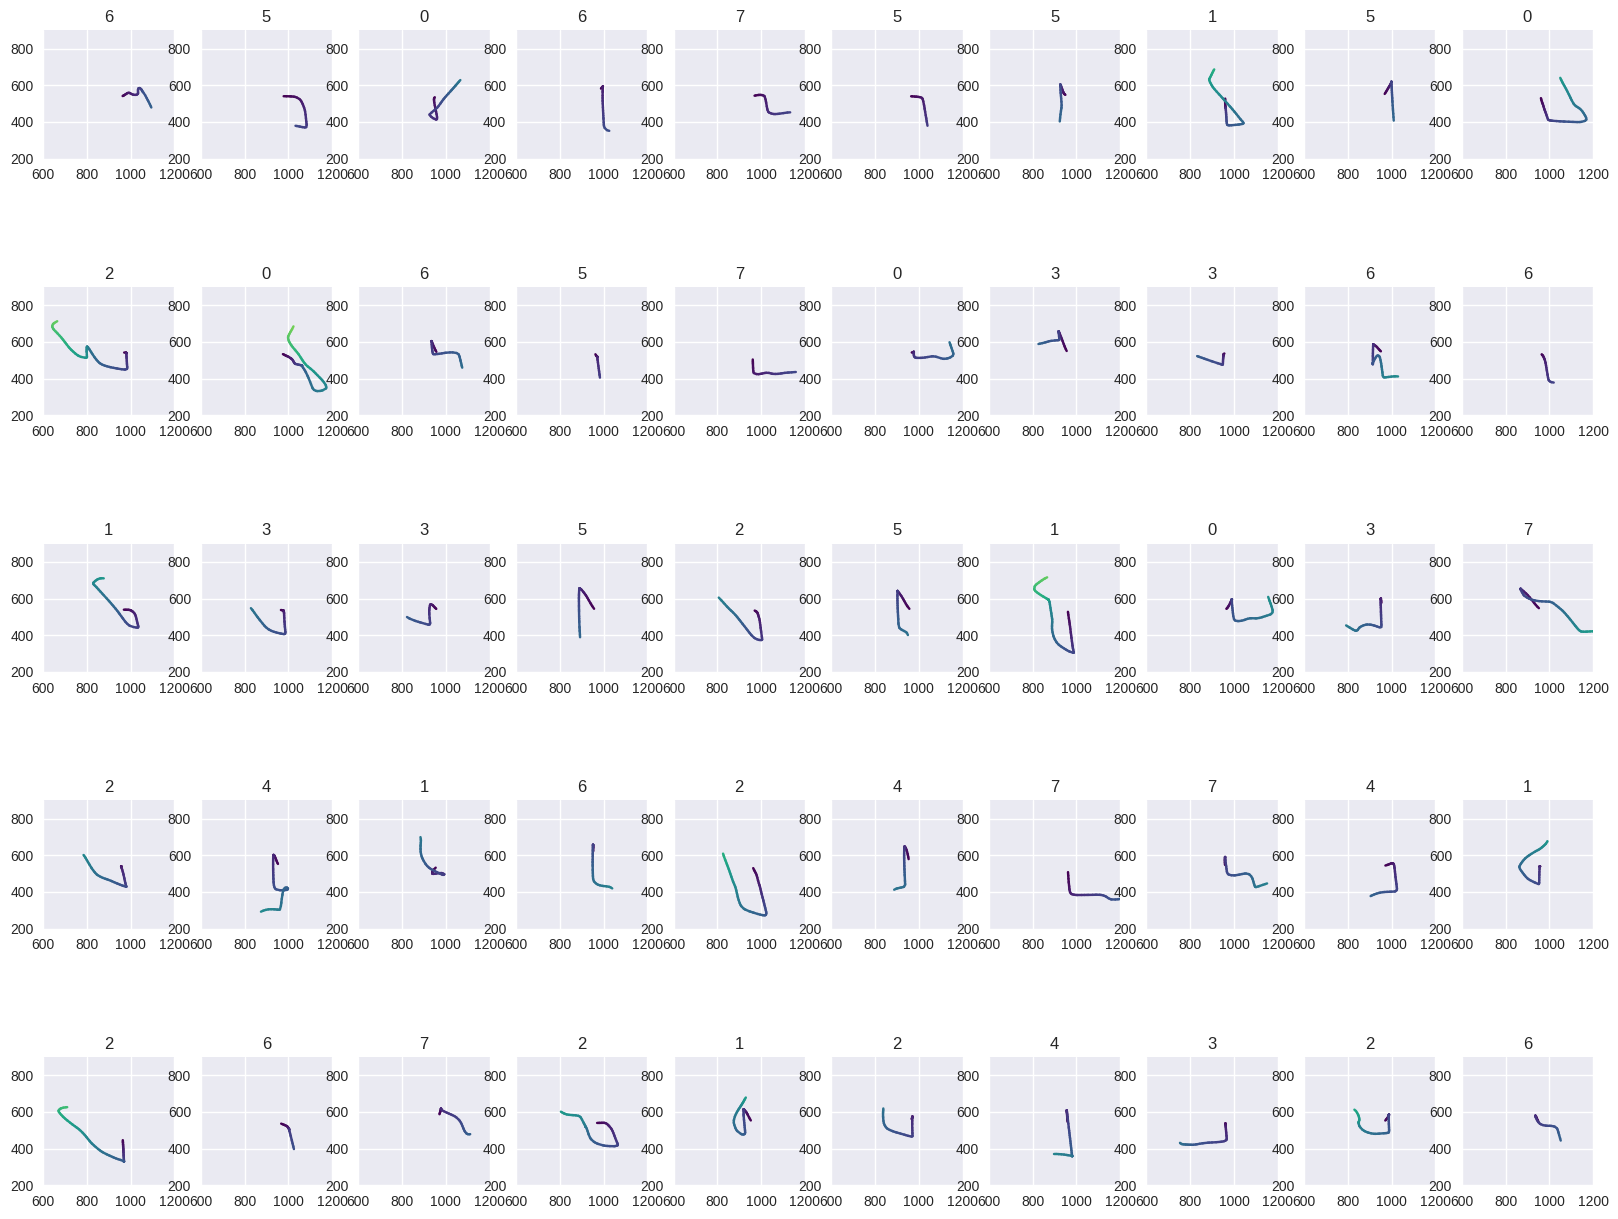

In [14]:
fig,ax = plt.subplots(5,10,figsize=(20,15))
plt.subplots_adjust(hspace=1)
for i in range(5):
    for j in range(10):
        x = data['Cursor'][(i * 10) + (j + 1)][:, 0]
        y = data['Cursor'][(i * 10) + (j + 1)][:, 1]
        for k in range(len(x) - 1):
            ax[i, j].plot(x[k:k+2], y[k:k+2], color=colors[k])
        ax[i,j].set_xlim(600,1200)
        ax[i,j].set_ylim(200,900)
        ax[i,j].set_title(f'{label_list[(i * 10) + (j + 1)]}')

In [9]:
data['Cursor'][0].shape

(55, 2)

In [11]:
data['Joystick'][1].shape

(38, 2)

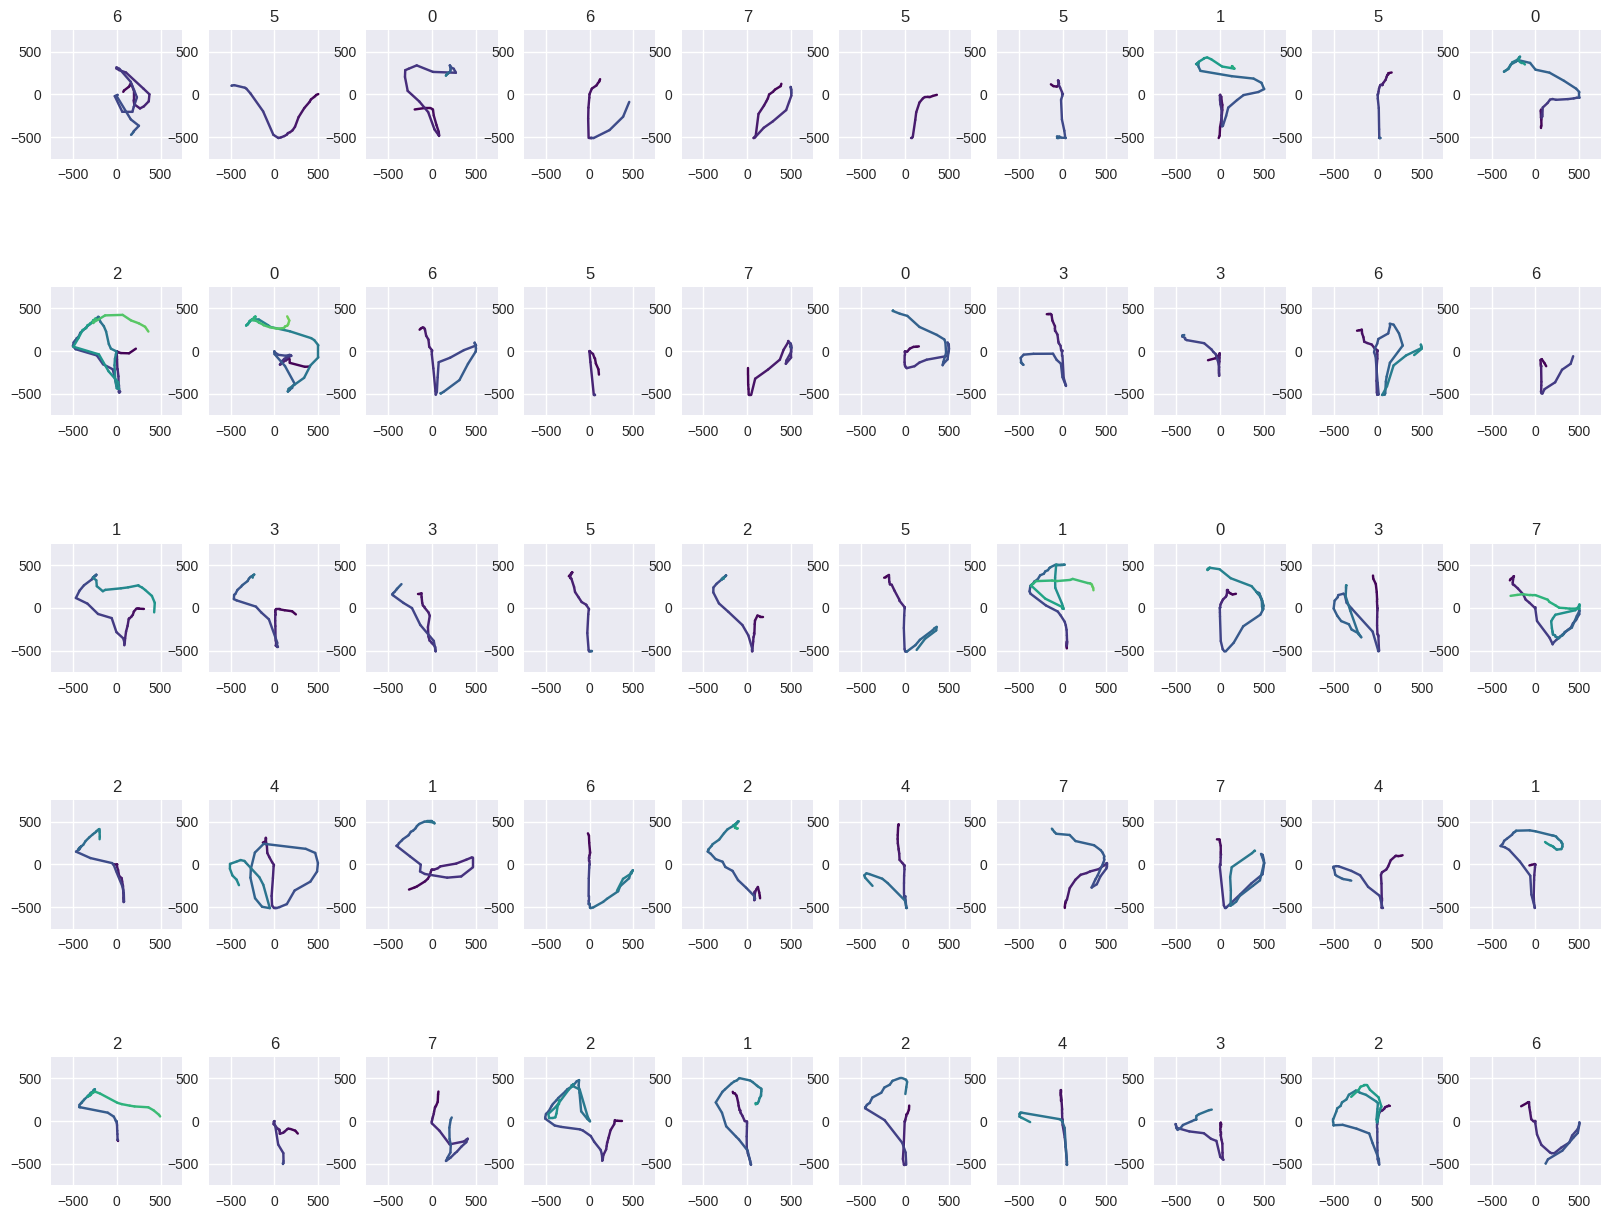

In [25]:
fig,ax = plt.subplots(5,10,figsize=(20,15))
plt.subplots_adjust(hspace=1)
for i in range(5):
    for j in range(10):
        x = data['Joystick'][(i * 10) + (j + 1)][:, 0]
        y = data['Joystick'][(i * 10) + (j + 1)][:, 1]
        for k in range(len(x) - 1):
            ax[i, j].plot(x[k:k+2], y[k:k+2], color=colors[k])
        ax[i,j].set_xlim(-750,750)
        ax[i,j].set_ylim(-750,750)
        ax[i,j].set_title(f'{label_list[(i * 10) + (j + 1)]}')

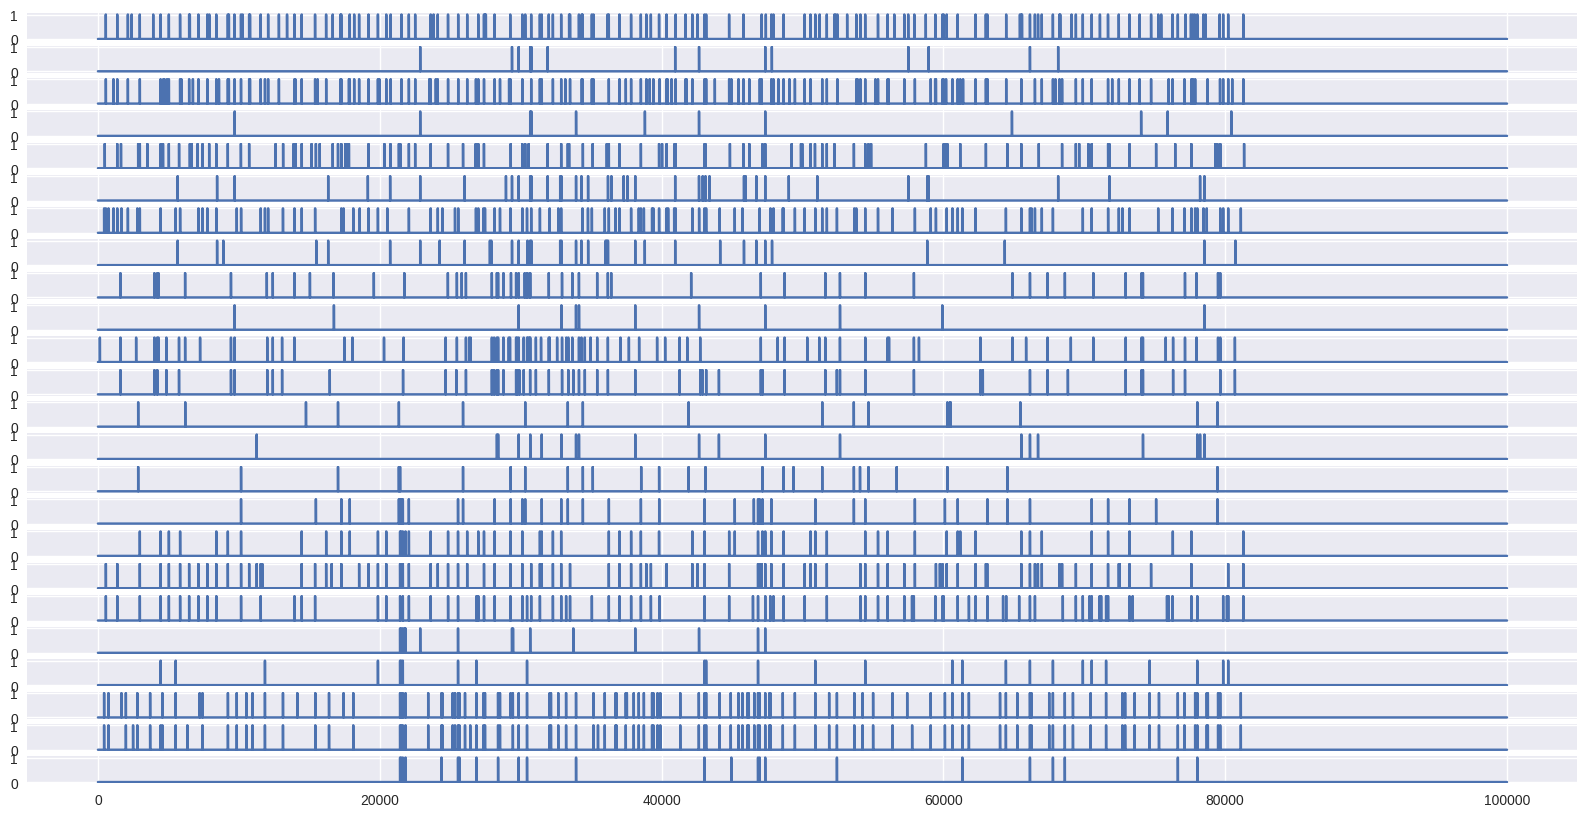

In [13]:
fig, ax = plt.subplots(24,figsize=(20,10))
for i in range(24):
    x = np.linspace(1,100000,100000)
    y = np.zeros_like(x)
    for index in data['NeuralTimestamp'][0][i]:
        y[index] = 1
    ax[i].plot(x,y)